Importing the required modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/TMDset.csv')

In [ ]:
df.head()

,FacialPain,JawStiffness,JawPain,ChewingDifficulty,EarPain,Headache,MouthPain,JointLocking,Dizziness,MuscleSpasms,Severity
0,MediumPain,LowStiffness,PainlessJaw,DifficultToChew,SeverePain,NowAndThen,PainfulMouth,Severe,Weak,Cramps,MediumTMD
1,MediumPain,SevereStiffness,PainlessJaw,AbleToChew,SeverePain,NowAndThen,PainlessMouth,NowAndThen,Weak,Cramps,LowTMD
2,HighPain,NoStiffness,PainlessJaw,DifficultToChew,LowPain,NoAche,PainlessMouth,NowAndThen,UnableToWalk,LowPainCramps,LowTMD
3,MediumPain,NoStiffness,PainlessJaw,UnableToChew,LowPain,NoAche,PainlessMouth,Severe,UnableToWalk,LowPainCramps,LowTMD
4,HighPain,SevereStiffness,PainfulJaw,DifficultToChew,SeverePain,Chronic,PainfulMouth,NowAndThen,Weak,Cramps,SevereTMD


In [ ]:
df["FacialPain"] = df["FacialPain"].map({'LowPain':1 ,'MediumPain':2,'HighPain':3})
df["JawStiffness"] = df["JawStiffness"].map({'NoStiffness':1 ,'LowStiffness':2,'SevereStiffness':3})
df["JawPain"] = df["JawPain"].map({'PainlessJaw':1 ,'PainfulJaw':2})
df["ChewingDifficulty"] = df["ChewingDifficulty"].map({'AbleToChew':1 ,'DifficultToChew':2,'UnableToChew':3})
df["EarPain"] = df["EarPain"].map({'NoPain':1 ,'LowPain':2,'SeverePain':3})
df["Headache"] = df["Headache"].map({'NoAche':1 ,'NowAndThen':2,'Chronic':3})
df["MouthPain"] = df["MouthPain"].map({'PainlessMouth':1 ,'PainfulMouth':2})
df["JointLocking"] = df["JointLocking"].map({'LowToNo':1 ,'NowAndThen':2,'Severe':3})
df["Dizziness"] = df["Dizziness"].map({'Weak':1 ,'UnableToWalk':2,'UnableToStand':3})
df["MuscleSpasms"] = df["MuscleSpasms"].map({'Cramps':1 ,'LowPainCramps':2,'HighPainCramps':3})
df["Severity"] = df["Severity"].map({'LowTMD':0 ,'MediumTMD':1,'SevereTMD':2})

In [ ]:
df.head()

,FacialPain,JawStiffness,JawPain,ChewingDifficulty,EarPain,Headache,MouthPain,JointLocking,Dizziness,MuscleSpasms,Severity
0,2,2,1,2,3,2,2,3,1,1,1
1,2,3,1,1,3,2,1,2,1,1,0
2,3,1,1,2,2,1,1,2,2,2,0
3,2,1,1,3,2,1,1,3,2,2,0
4,3,3,2,2,3,3,2,2,1,1,2


Cleaning empty cells

In [ ]:
empty_df = df.dropna()
print(empty_df.to_string())

      FacialPain  JawStiffness  JawPain  ChewingDifficulty  EarPain  Headache  MouthPain  JointLocking  Dizziness  MuscleSpasms  Severity
0              2             2        1                  2        3         2          2             3          1             1         1
1              2             3        1                  1        3         2          1             2          1             1         0
2              3             1        1                  2        2         1          1             2          2             2         0
3              2             1        1                  3        2         1          1             3          2             2         0
4              3             3        2                  2        3         3          2             2          1             1         2
5              2             2        1                  1        3         2          2             3          3             1         1
6              3             1    

In [ ]:
#Removing Duplicates
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
3634    False
3635    False
3636    False
3637    False
3638    False
Length: 3639, dtype: bool


In [ ]:
#Saving the variables to a List
columns = list(df.columns)
columns

['FacialPain',
 'JawStiffness',
 'JawPain',
 'ChewingDifficulty',
 'EarPain',
 'Headache',
 'MouthPain',
 'JointLocking',
 'Dizziness',
 'MuscleSpasms',
 'Severity']

In [ ]:
#Looking at the proportion of missing data

print(df.isnull().mean())
print("")

FacialPain           0.0
JawStiffness         0.0
JawPain              0.0
ChewingDifficulty    0.0
EarPain              0.0
Headache             0.0
MouthPain            0.0
JointLocking         0.0
Dizziness            0.0
MuscleSpasms         0.0
Severity             0.0
dtype: float64



In [ ]:
#Checking the Datatype of each column
print(df.dtypes)

FacialPain           int64
JawStiffness         int64
JawPain              int64
ChewingDifficulty    int64
EarPain              int64
Headache             int64
MouthPain            int64
JointLocking         int64
Dizziness            int64
MuscleSpasms         int64
Severity             int64
dtype: object


In [ ]:
df.describe()

,FacialPain,JawStiffness,JawPain,ChewingDifficulty,EarPain,Headache,MouthPain,JointLocking,Dizziness,MuscleSpasms,Severity
count,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000,3639.000000
mean,1.996428,2.015114,1.503160,2.014015,2.016488,1.992855,1.495741,2.001924,1.988733,1.986535,0.861775
std,0.814410,0.820331,0.500059,0.811254,0.824816,0.812190,0.500051,0.815428,0.809940,0.823370,0.818873
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000
75%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
max,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000


In [ ]:
x = df.drop(columns = 'Severity', axis = 1)
y = df['Severity']

In [ ]:
print(x.columns)

Index(['FacialPain', 'JawStiffness', 'JawPain', 'ChewingDifficulty', 'EarPain',
       'Headache', 'MouthPain', 'JointLocking', 'Dizziness', 'MuscleSpasms'],
      dtype='object')


In [ ]:
print(y)

0       1
1       0
2       0
3       0
4       2
       ..
3634    1
3635    2
3636    2
3637    0
3638    0
Name: Severity, Length: 3639, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(3639, 10) (2911, 10) (728, 10)


In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=5,epochs = 50)

Epoch 1/50
583/583 [==============================] - 3s 3ms/step - loss: 0.5355 - accuracy: 0.3490
Epoch 2/50
583/583 [==============================] - 2s 3ms/step - loss: 0.1625 - accuracy: 0.3188
Epoch 3/50
583/583 [==============================] - 1s 2ms/step - loss: 0.1198 - accuracy: 0.3188
Epoch 4/50
583/583 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.3188
Epoch 5/50
583/583 [==============================] - 1s 2ms/step - loss: -0.0292 - accuracy: 0.3188
Epoch 6/50
583/583 [==============================] - 1s 2ms/step - loss: -0.1735 - accuracy: 0.3191
Epoch 7/50
583/583 [==============================] - 1s 2ms/step - loss: -0.3819 - accuracy: 0.3291
Epoch 8/50
583/583 [==============================] - 1s 2ms/step - loss: -0.6571 - accuracy: 0.3487
Epoch 9/50
583/583 [==============================] - 1s 2ms/step - loss: -1.0229 - accuracy: 0.3576
Epoch 10/50
583/583 [==============================] - 1s 2ms/step - loss: -1.4890 - accuracy: 

In [ ]:
y_log = ann.predict(x_test)

23/23 [==============================] - 0s 2ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
ann = accuracy_score(y_test, y_pred)
ann

0.38461538461538464

In [ ]:
ann_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy of the Test data: " + str(round(ann_accuracy, 2))+ '%')

Accuracy of the Test data: 38.46%


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
# training the logistic regression model with training data
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
y_pred = model.predict(x_test)

fsc = metrics.f1_score(y_test, y_pred, average = 'weighted')
fsc_p = fsc*100
print("f1 score is: " + str(round(fsc_p, 2)) + '%')

f1 score is: 100.0%


In [ ]:
test_inp_pred = model.predict(x_test)
ted_accuracy = accuracy_score(test_inp_pred, y_test)*100
print("Accuracy of the Test data: " + str(round(ted_accuracy, 2)) + '%')

Accuracy of the Test data: 100.0%


**SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)

In [ ]:
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
xtrain_svm_pred = svc.predict(x_train)
xtrain_svm_pred

array([1, 0, 0, ..., 0, 0, 2])

In [ ]:
from sklearn import metrics
y_pred = svc.predict(x_test)

fsc = metrics.f1_score(y_test, y_pred, average = 'weighted')
fsc_p = fsc*100
print("f1 score is: " + str(round(fsc_p, 2)) + '%')

f1 score is: 100.0%


In [ ]:
accuracy_score(y_train, xtrain_svm_pred)
svm_train_accuracy = accuracy_score(y_train, xtrain_svm_pred)*100
print("Accuracy of training data is: " + str(round(svm_train_accuracy, 2)) + '%')

Accuracy of training data is: 100.0%


In [ ]:
xtest_svm_pred = svc.predict(x_test)
xtest_svm_pred

array([2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1,
       2, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1,

In [ ]:
accuracy_score(y_test, xtest_svm_pred)
svm_test_accuracy = accuracy_score(y_test, xtest_svm_pred)*100
print("Accuracy of the model or test data is: " + str(round(svm_test_accuracy, 2)) + '%')

Accuracy of the model or test data is: 100.0%


In [ ]:
model_compare = pd.DataFrame({"Artificial Neural Network":ann_accuracy,
                              "Logistic Regression":ted_accuracy,
                              "Support Vector Machine":svm_test_accuracy,}, index = ["accuracy"])
model_compare

,Artificial Neural Network,Logistic Regression,Support Vector Machine
accuracy,38.461538,100.0,100.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/TMDset.csv')

In [ ]:
df.head()

,FacialPain,JawStiffness,JawPain,ChewingDifficulty,EarPain,Headache,MouthPain,JointLocking,Dizziness,MuscleSpasms,Severity
0,MediumPain,LowStiffness,PainlessJaw,DifficultToChew,SeverePain,NowAndThen,PainfulMouth,Severe,Weak,Cramps,MediumTMD
1,MediumPain,SevereStiffness,PainlessJaw,AbleToChew,SeverePain,NowAndThen,PainlessMouth,NowAndThen,Weak,Cramps,LowTMD
2,HighPain,NoStiffness,PainlessJaw,DifficultToChew,LowPain,NoAche,PainlessMouth,NowAndThen,UnableToWalk,LowPainCramps,LowTMD
3,MediumPain,NoStiffness,PainlessJaw,UnableToChew,LowPain,NoAche,PainlessMouth,Severe,UnableToWalk,LowPainCramps,LowTMD
4,HighPain,SevereStiffness,PainfulJaw,DifficultToChew,SeverePain,Chronic,PainfulMouth,NowAndThen,Weak,Cramps,SevereTMD


In [ ]:
df["FacialPain"] = df["FacialPain"].map({'LowPain':1 ,'MediumPain':2,'HighPain':3})
df["JawStiffness"] = df["JawStiffness"].map({'NoStiffness':1 ,'LowStiffness':2,'SevereStiffness':3})
df["JawPain"] = df["JawPain"].map({'PainlessJaw':1 ,'PainfulJaw':2})
df["ChewingDifficulty"] = df["ChewingDifficulty"].map({'AbleToChew':1 ,'DifficultToChew':2,'UnableToChew':3})
df["EarPain"] = df["EarPain"].map({'NoPain':1 ,'LowPain':2,'SeverePain':3})
df["Headache"] = df["Headache"].map({'NoAche':1 ,'NowAndThen':2,'Chronic':3})
df["MouthPain"] = df["MouthPain"].map({'PainlessMouth':1 ,'PainfulMouth':2})
df["JointLocking"] = df["JointLocking"].map({'LowToNo':1 ,'NowAndThen':2,'Severe':3})
df["Dizziness"] = df["Dizziness"].map({'Weak':1 ,'UnableToWalk':2,'UnableToStand':3})
df["MuscleSpasms"] = df["MuscleSpasms"].map({'Cramps':1 ,'LowPainCramps':2,'HighPainCramps':3})
df["Severity"] = df["Severity"].map({'LowTMD':0 ,'MediumTMD':1,'SevereTMD':2})

In [ ]:
df.head()

,FacialPain,JawStiffness,JawPain,ChewingDifficulty,EarPain,Headache,MouthPain,JointLocking,Dizziness,MuscleSpasms,Severity
0,2,2,1,2,3,2,2,3,1,1,1
1,2,3,1,1,3,2,1,2,1,1,0
2,3,1,1,2,2,1,1,2,2,2,0
3,2,1,1,3,2,1,1,3,2,2,0
4,3,3,2,2,3,3,2,2,1,1,2


In [ ]:
# Cleaning empty cells
empty_df = df.dropna()
print(empty_df.to_string())

      FacialPain  JawStiffness  JawPain  ChewingDifficulty  EarPain  Headache  MouthPain  JointLocking  Dizziness  MuscleSpasms  Severity
0              2             2        1                  2        3         2          2             3          1             1         1
1              2             3        1                  1        3         2          1             2          1             1         0
2              3             1        1                  2        2         1          1             2          2             2         0
3              2             1        1                  3        2         1          1             3          2             2         0
4              3             3        2                  2        3         3          2             2          1             1         2
5              2             2        1                  1        3         2          2             3          3             1         1
6              3             1    

In [ ]:
#Removing Duplicates
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
3634    False
3635    False
3636    False
3637    False
3638    False
Length: 3639, dtype: bool


In [ ]:
#Saving the variables to a List
columns = list(df.columns)
columns

['FacialPain',
 'JawStiffness',
 'JawPain',
 'ChewingDifficulty',
 'EarPain',
 'Headache',
 'MouthPain',
 'JointLocking',
 'Dizziness',
 'MuscleSpasms',
 'Severity']

In [ ]:
#Looking at the proportion of missing data

print(df.isnull().mean())
print("")

FacialPain           0.0
JawStiffness         0.0
JawPain              0.0
ChewingDifficulty    0.0
EarPain              0.0
Headache             0.0
MouthPain            0.0
JointLocking         0.0
Dizziness            0.0
MuscleSpasms         0.0
Severity             0.0
dtype: float64



In [ ]:
#Checking the Datatype of each column
print(df.dtypes)

FacialPain           int64
JawStiffness         int64
JawPain              int64
ChewingDifficulty    int64
EarPain              int64
Headache             int64
MouthPain            int64
JointLocking         int64
Dizziness            int64
MuscleSpasms         int64
Severity             int64
dtype: object


In [ ]:
x= df.iloc[:,0:13].values
y= df['Severity'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

KNN

Minimum error:- 0.0032967032967032967 at K = 29


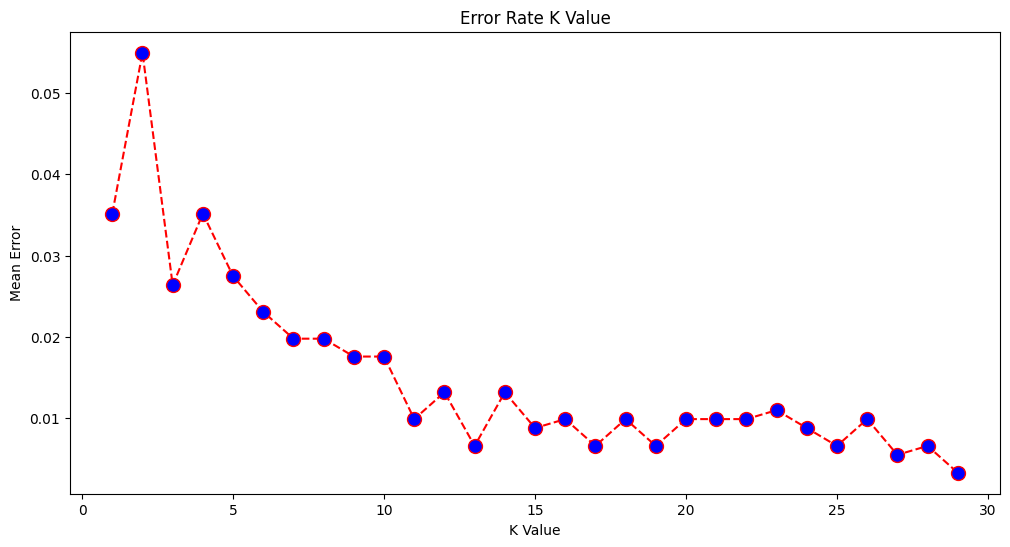

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[395,   4,   0],
       [ 10, 252,   1],
       [  0,   3, 245]])

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred)*100

In [ ]:
print("Accuracy of KNN model is: " + str(round(knn_accuracy, 2)) + '%')

Accuracy of KNN model is: 98.02%


MULTI-LAYER PERCEPTRON

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
classifier = MLPClassifier()
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

In [ ]:
mlp_accuracy = accuracy_score(y_test, predictions)*100
print ("The accuracy score of MLP Classifier is: " + str(mlp_accuracy) + '%')

The accuracy score of MLP Classifier is: 100.0%


In [ ]:
model_compare = pd.DataFrame({"KNN":knn_accuracy,
                              "MLP":mlp_accuracy,"Artificial Neural Network":ann_accuracy,"Logistic Regression":ted_accuracy,
                              "Support Vector Machine":svm_test_accuracy,}, index = ["accuracy"])
model_compare

,KNN,MLP,Artificial Neural Network,Logistic Regression,Support Vector Machine
accuracy,98.021978,100.0,38.461538,100.0,100.0
